In [1]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import pandas as pd


In [2]:
# دستگاه: GPU اگر موجود باشه
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Using device: {device}")

⚡ Using device: cuda


In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# بارگذاری تصویر
image = Image.open("/content/download.jpg").convert("RGB")

In [35]:
categories = {
    "cap-shape": ["flat", "convex", "bell-shaped", "sunken"],
    "cap-surface": ["smooth", "scaly", "wrinkled"],
    "cap-color": ["red", "brown", "white", "yellow", "black", "gray"],
    "does-bruise-or-bleed": ["yes", "no"],
    "gill-attachment": ["attached", "free", "decurrent"],
    "gill-spacing": ["close", "crowded", "distant"],
    "gill-color": ["white", "brown", "pink", "black", "yellow"],
    "stem-height": ["short", "medium", "tall"],  # عدد واقعی: جایگزین با object detection
    "stem-width": ["thin", "medium", "thick"],   # عدد واقعی: جایگزین با object detection
    "stem-root": ["bulbous", "club", "rooted", "missing"],
    "stem-surface": ["smooth", "scaly", "fibrous"],
    "stem-color": ["white", "brown", "gray", "yellow"],
    "veil-type": ["partial", "universal", "none"],
    "veil-color": ["white", "brown", "yellow", "none"],
    "has-ring": ["yes", "no"],
    "ring-type": ["pendant", "flaring", "none"],
    "spore-print-color": ["white", "brown", "black", "purple", "yellow"],
    "habitat": ["forest", "grass", "wood", "field", "soil"],
    "season": ["spring", "summer", "autumn", "winter"]
}

In [16]:
df_categories = pd.read_excel("/content/unique_features.xlsx")

In [19]:
df_categories

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,f,s,u,f,a,c,w,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,x,h,o,t,x,NaN,n,b,y,o,u,n,t,z,k,l,w
2,p,y,b,d,s,d,g,c,s,n,d,w,h,e,w,g,u
3,b,l,g,has-ring,d,f,k,r,t,y,a,k,r,NaN,p,h,s
4,o,t,w,w,e,x,y,s,g,e,h,y,y,p,n,p,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,10.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,is k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
categories = {col: df_categories[col].dropna().unique().tolist() for col in df_categories.columns}


In [ ]:
categories

In [11]:
import matplotlib.pyplot as plt

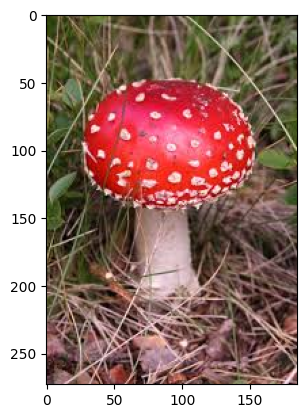

In [12]:
plt.imshow(image)
plt.show()

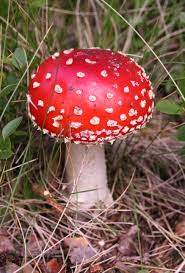

In [4]:
image

In [36]:
results = {}

# تشخیص ویژگی‌ها با CLIP
with torch.no_grad():
    for feature, options in categories.items():
        # skip numeric placeholders for now
        if feature in ["cap-diameter", "stem-height", "stem-width"]:
            results[feature] = None  # عدد واقعی رو بعدا می‌تونی پر کنی
            continue

        inputs = processor(text=options, images=image, return_tensors="pt", padding=True).to(device)
        outputs = model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)
        best_index = probs.argmax().item()
        best_option = options[best_index]
        results[feature] = best_option

# ساخت DataFrame
df = pd.DataFrame([results])

In [37]:
# نمایش تمام ستون‌ها بدون کوتاه شدن
pd.set_option("display.max_columns", None)
print(df)

     cap-shape cap-surface cap-color does-bruise-or-bleed gill-attachment  \
0  bell-shaped       scaly       red                   no            free   

  gill-spacing gill-color stem-height stem-width stem-root stem-surface  \
0      crowded       pink        None       None   bulbous      fibrous   

  stem-color veil-type veil-color has-ring ring-type spore-print-color  \
0      brown   partial      brown       no   pendant            purple   

  habitat  season  
0  forest  autumn  


In [38]:
df

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,bell-shaped,scaly,red,no,free,crowded,pink,None,None,bulbous,fibrous,brown,partial,brown,no,pendant,purple,forest,autumn


In [39]:
df1=pd.DataFrame(df)

In [40]:
df1

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,bell-shaped,scaly,red,no,free,crowded,pink,None,None,bulbous,fibrous,brown,partial,brown,no,pendant,purple,forest,autumn
